# Exploratory Data Analysis (EDA) of Unicorn Companies

Performing Exploratory Data Analysis on a dataset containing data of 1,000+ Unicorn Companies from different countries. The EDA done over here will contain 4 main steps :

1. Discovering : In this step I have just checked what is there in my dataset. What type of columns, what kind of datatypes do these columns have. Basically, it is a descriptive analysis of the dataset.
2. Cleaning : In this step I have checked for duplicates and missing values.
3. Transforming : Some columns need to be transformed into different datatypes in order for me to conduct some analysis. So I will go about and check which columns need to be tranformed in order for me to perform some specific operations so that I can finally do some analysis.
4. Visualization : Finally, I will do some analysis using a visualization tool. I will use Matplotlib to analyze our dataset. This will give us some basic insight about our data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
companies = pd.read_csv("Unicorn_Companies.csv")

# Discovering

In [3]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
companies.size

10740

In [5]:
companies.shape

(1074, 10)

In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [7]:
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


# Cleaning

Checking for missing values

In [8]:
companies.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

Removing missing values

In [9]:
companies = companies.dropna()

In [10]:
companies.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country/Region      0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

Checking for duplicate values

In [11]:
companies.duplicated().sum()

0

# Transformation

We are transforming the 'Date Joined' column into date-time data type. Doing this will enable me to conduct an anlysis where I can check how long a company took to become a Unicorn. Furthermore, this will enable me to extract year from 'Date Joined' column so I can analyze which year gave us the maximum Unicorns.

In [12]:
import datetime as dt

companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

In [13]:
companies['Date Joined'].dtype

dtype('<M8[ns]')

Extracting year from 'Date Joined' column.

In [14]:
companies['Year'] = companies['Date Joined'].dt.year

In [15]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


We will do a sector-wise analysis to know what the maximum time it took a company from a particular sector to become a Unicorn.

In [16]:
companies['Max Time to Unicorn'] = companies['Year'] - companies['Year Founded']
data_years = companies[['Industry', 'Max Time to Unicorn']].groupby('Industry').max().sort_values('Max Time to Unicorn').reset_index()
data_years

,Industry,Max Time to Unicorn
0,Artificial Intelligence,14
1,Auto & transportation,14
2,Travel,14
3,Artificial intelligence,15
4,Edtech,17
5,Hardware,18
6,Mobile & telecommunications,20
7,"Supply chain, logistics, & delivery",20
8,Cybersecurity,21
9,Internet software & services,21


# Visualization

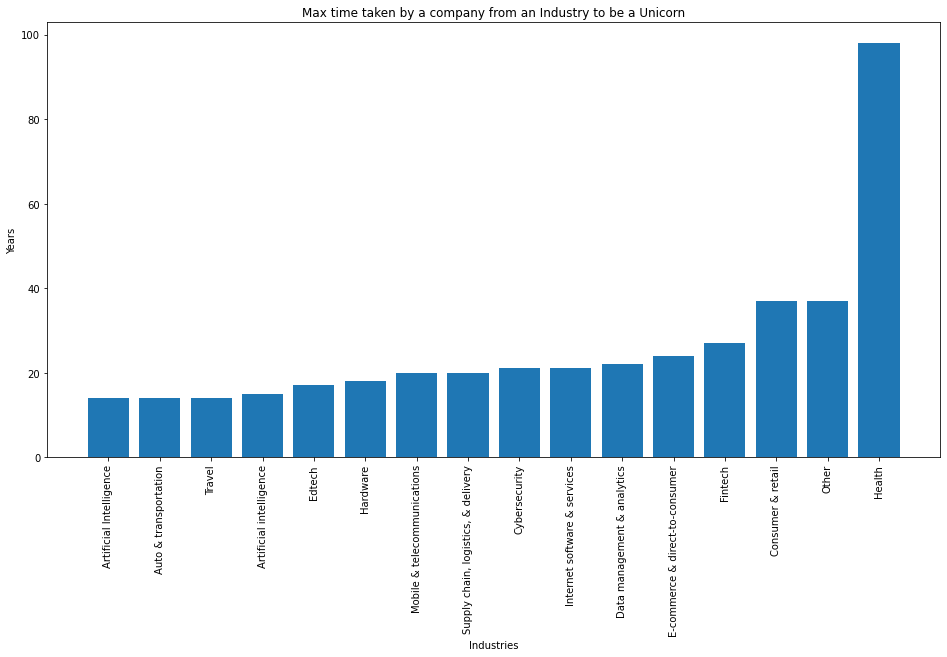

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.bar(x=data_years['Industry'], height=data_years['Max Time to Unicorn'])
plt.title('Max time taken by a company from an Industry to be a Unicorn')
plt.xlabel('Industries')
plt.ylabel('Years')
plt.xticks(rotation=90)
plt.show()

Transforming 'Valuation' column. This will enable me to analyze the most valued company from a particular sector.

In [18]:
companies['valuation_numeric'] = companies['Valuation'].str.replace('$','')
companies['valuation_numeric'] = companies['valuation_numeric'].str.replace('B','')
companies['valuation_numeric'] = companies['valuation_numeric'].astype('int')
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year,Max Time to Unicorn,valuation_numeric
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,5,180
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,10,100
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,10,100
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,4,95
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,6,46


In [19]:
data_valuation = companies[['Industry', 'valuation_numeric']].groupby('Industry').max().sort_values('valuation_numeric').reset_index()
data_valuation

,Industry,valuation_numeric
0,Artificial Intelligence,3
1,Cybersecurity,9
2,Mobile & telecommunications,9
3,Travel,10
4,Auto & transportation,11
5,Hardware,12
6,Health,13
7,Edtech,22
8,Consumer & retail,38
9,Data management & analytics,38


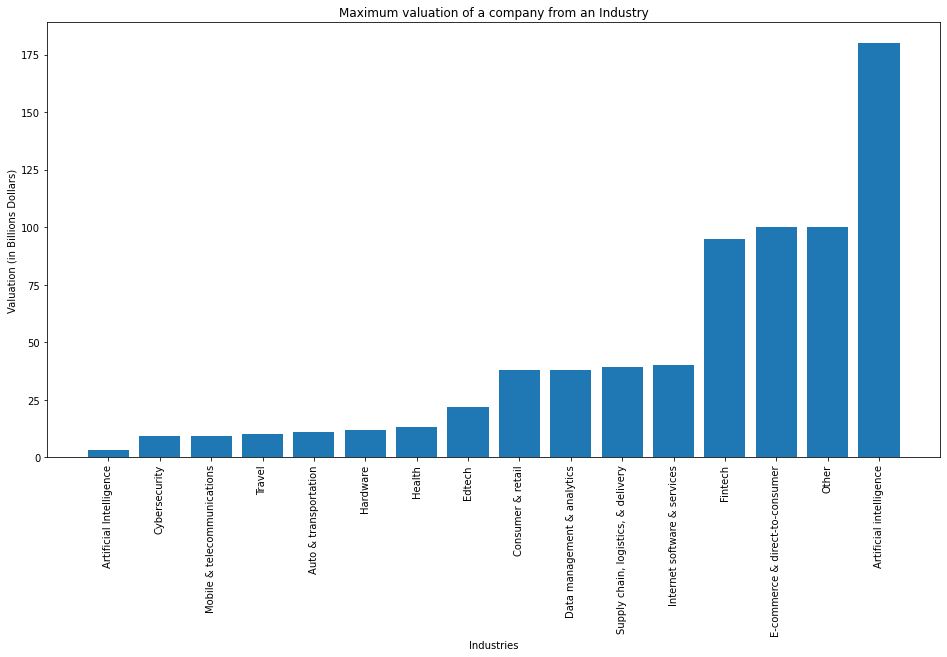

In [20]:
plt.figure(figsize=(16,8))
plt.bar(x=data_valuation['Industry'], height=data_valuation['valuation_numeric'])
plt.title('Maximum valuation of a company from an Industry')
plt.xlabel('Industries')
plt.ylabel('Valuation (in Billions Dollars)')
plt.xticks(rotation=90)
plt.show()

Now I will analyze number of companies that are Unicorn with respect to Year they were founded in.

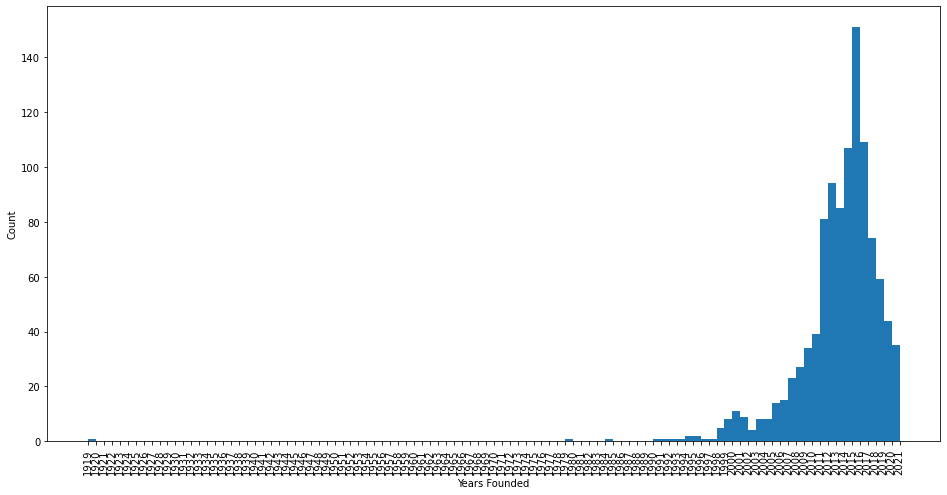

In [21]:
plt.figure(figsize=(16,8))
plt.hist(x=companies['Year Founded'], bins=range(1919,2022,1))
plt.xticks(range(1919,2022,1), rotation=90)
plt.xlabel('Years Founded')
plt.ylabel('Count')
plt.show()

Extracting Month Names, and calculating years it took by a company to become Unicorn.

In [22]:
companies['Month Joined'] = companies['Date Joined'].dt.month_name()
companies['Years to Join'] = companies['Year'] - companies['Year Founded']

Visuzlizing Years taken by Companies to become Unicorns by Month they Joined. We will use Seaborn for this visualization.

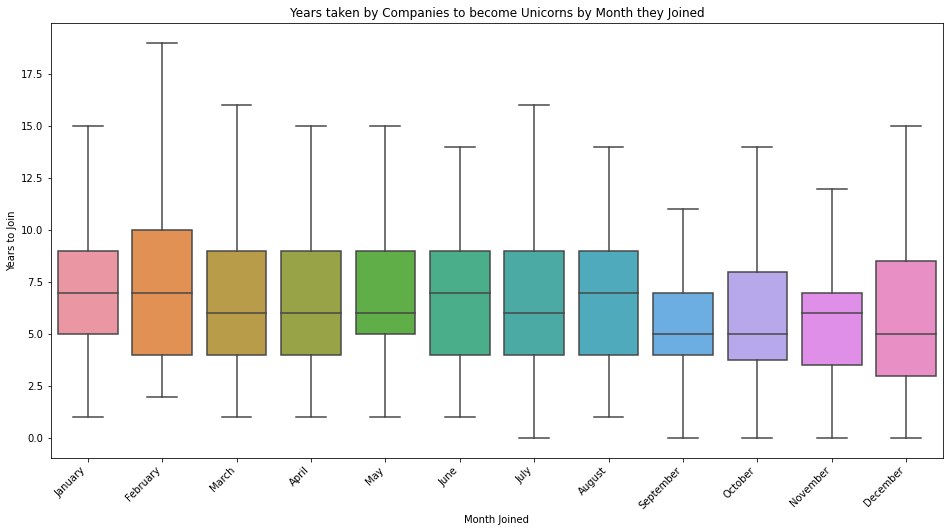

In [23]:
import seaborn as sns

Months_Order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                'October', 'November', 'December']

plt.figure(figsize=(16,8))
X = sns.boxplot(data = companies,
            x = 'Month Joined',
            y = 'Years to Join',
            order = Months_Order,
            showfliers=False)

X.set_title('Years taken by Companies to become Unicorns by Month they Joined')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()